In [6]:
from functions import *
from inverse_RTI import inverse_RTI_algo


parameters = {}

parameters['time'] = time.time()
parameters['num_devices'] = 20
parameters['device_indices'] = [x+1 for x in range(parameters['num_devices'])]

# device parameters
parameters['sample_rate'] = 1e6  # Hz
parameters['num_samples'] = 100  # number of samples per call to rx()
parameters['center_freq'] = 2.4e9  # Hz
parameters['bandwidth'] = 10  # Hz
parameters['transmitter_attenuation'] = 0  # dB
parameters['receiver_gain'] = 40  # dB

# imaging parameters
parameters['doi_size'] = 3
parameters['alpha'] = 1e2  # 1e2
parameters['grid_resolution'] = 0.1
parameters['detection_size'] = 0.1
parameters['pixel_size'] = (int(parameters['doi_size']/parameters['grid_resolution']), int(parameters['doi_size']/parameters['grid_resolution']))

parameters['eterm'] = 1

signal = generate_signal()

devices = init_devices(parameters)


In [7]:
# counter = 0
# while True:
#     counter += 1
#     np.save(f'result/{counter}.npy', data_collection_once(parameters, signal, devices))
#     print(counter)
#     # time.sleep(10)
#     input("Press Enter to continue...")


In [8]:
import scipy.io
import pathlib
from functions import *
from inverse_RTI import *
from xPRA import *


parameters = {}

parameters['time'] = time.time()
parameters['num_devices'] = 20
parameters['device_indices'] = [x+1 for x in range(parameters['num_devices'])]

# device parameters
parameters['sample_rate'] = 1e6  # Hz
parameters['num_samples'] = 100  # number of samples per call to rx()
parameters['center_freq'] = 2.4e9  # Hz
parameters['bandwidth'] = 10  # Hz
parameters['transmitter_attenuation'] = 0  # dB
parameters['receiver_gain'] = 40  # dBsim_result
parameters['wavelength'] = 3e8/parameters['center_freq']


# imaging parameters
parameters['doi_size'] = 3
parameters['alpha'] = 0.5  # 1e2
parameters['grid_resolution'] = 0.05
parameters['detection_size'] = 0.1
parameters['pixel_size'] = (int(parameters['doi_size']/parameters['grid_resolution']), int(parameters['doi_size']/parameters['grid_resolution']))

parameters['eterm'] = 1
parameters['k0'] = 2*np.pi/parameters['wavelength']
parameters['cellrad'] = (np.sqrt(parameters['grid_resolution']**2/np.pi)*2)/2


signal = generate_signal()

# devices = init_devices(parameters)

FrytB = xPRA_preparation(parameters)


plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400


In [9]:

parameters['time'] = time.time()
parameters['num_devices'] = 20
parameters['device_indices'] = [x+1 for x in range(parameters['num_devices'])]

# device parameters
parameters['sample_rate'] = 1e6  # Hz
parameters['num_samples'] = 100  # number of samples per call to rx()
parameters['center_freq'] = 2.4e9  # Hz
parameters['bandwidth'] = 10  # Hz
parameters['transmitter_attenuation'] = 0  # dB
parameters['receiver_gain'] = 40  # dBsim_result
parameters['wavelength'] = 3e8/parameters['center_freq']


# imaging parameters
parameters['doi_size'] = 3
parameters['alpha'] = 0.5  # 1e2
parameters['grid_resolution'] = 0.05
parameters['detection_size'] = 0.1
parameters['pixel_size'] = (int(parameters['doi_size']/parameters['grid_resolution']), int(parameters['doi_size']/parameters['grid_resolution']))

parameters['eterm'] = 1
parameters['k0'] = 2*np.pi/parameters['wavelength']
parameters['cellrad'] = (np.sqrt(parameters['grid_resolution']**2/np.pi)*2)/2


signal = generate_signal()

# devices = init_devices(parameters)

FrytB, FrytBat = xPRA_preparation(parameters)


plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams.update({'font.size': 5})

In [10]:
path = 'result'
test_files = sorted(list(pathlib.Path(path).glob('*.npy')))

Pinc = np.load(test_files.pop(0))
Pinc = magnitude_to_db(abs(np.mean(np.squeeze(Pinc), axis=2)), parameters['receiver_gain'])
Pinc = Pinc[~np.eye(Pinc.shape[0], dtype=bool)].reshape(-1, 1)


result = []
for Ptot in test_files:
    Ptot = np.load(Ptot)
    Ptot = magnitude_to_db(abs(np.mean(np.squeeze(Ptot), axis=2)), parameters['receiver_gain'])
    Ptot = Ptot[~np.eye(Ptot.shape[0], dtype=bool)].reshape(-1, 1)
    # scipy.io.savemat(path+f'/Ptot{i+1}.mat', {'Ptot': Ptot.reshape((19, 20), order='F')})

    xPRA_result = xPRA(parameters, FrytB, FrytBat, Pinc, Ptot)
    result.append(xPRA_result)


In [3]:
(50,)*2

(50, 50)

In [11]:
def plot_test_ptot(result, title=None):
    fig, axs = plt.subplots(1, len(test_files))
    sub_titles = ['Bottom Left', 'Bottom Right', 'Top Right', 'Top Left']
    fig.subplots_adjust(top=0.8)
    
    for i in range(len(result)):

        im = axs[i].imshow(result[i], extent=[-1.5, 1.5, -1.5, 1.5], cmap='jet')
        fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)
        axs[i].set_title(f'[{i+1}]{sub_titles[i]}')
        
    
    fig.suptitle(title, weight='bold', y=0.64)
    plt.tight_layout()
    plt.show()

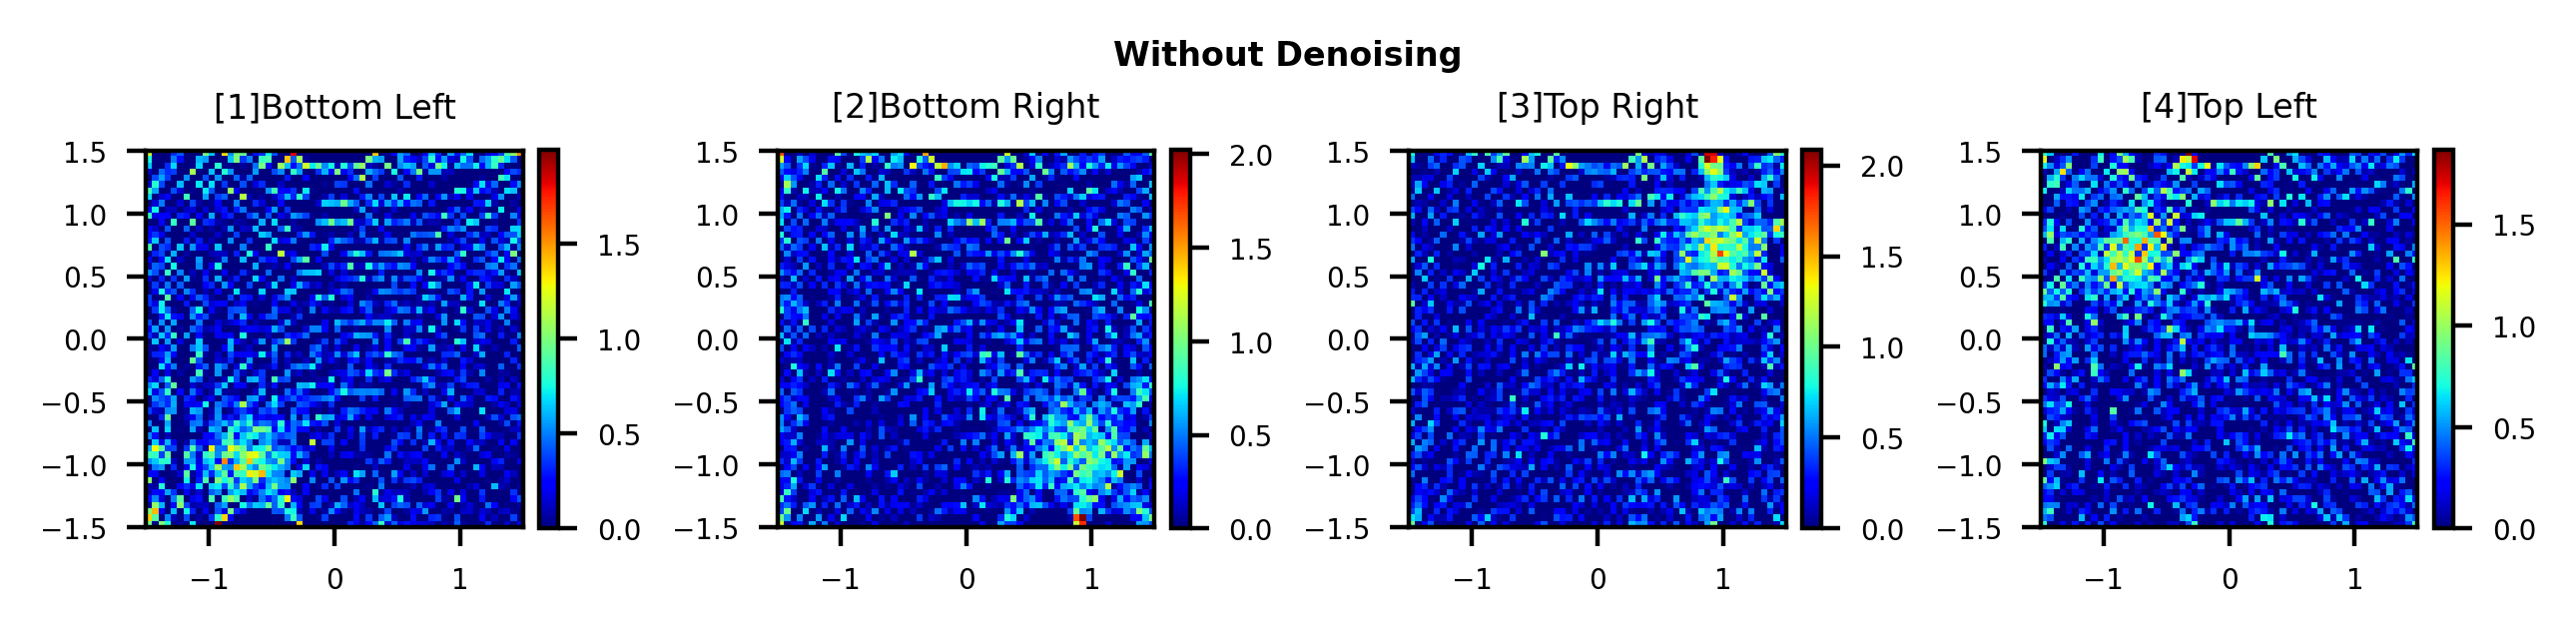

In [12]:
plot_test_ptot(result, 'Without Denoising')

In [13]:
# import bm3d
# sigma = 20.0 / 255  # noise standard deviation

# plot_test_ptot([bm3d.bm3d(x, sigma_psd=40 / 255) for x in result], 'BM3D')


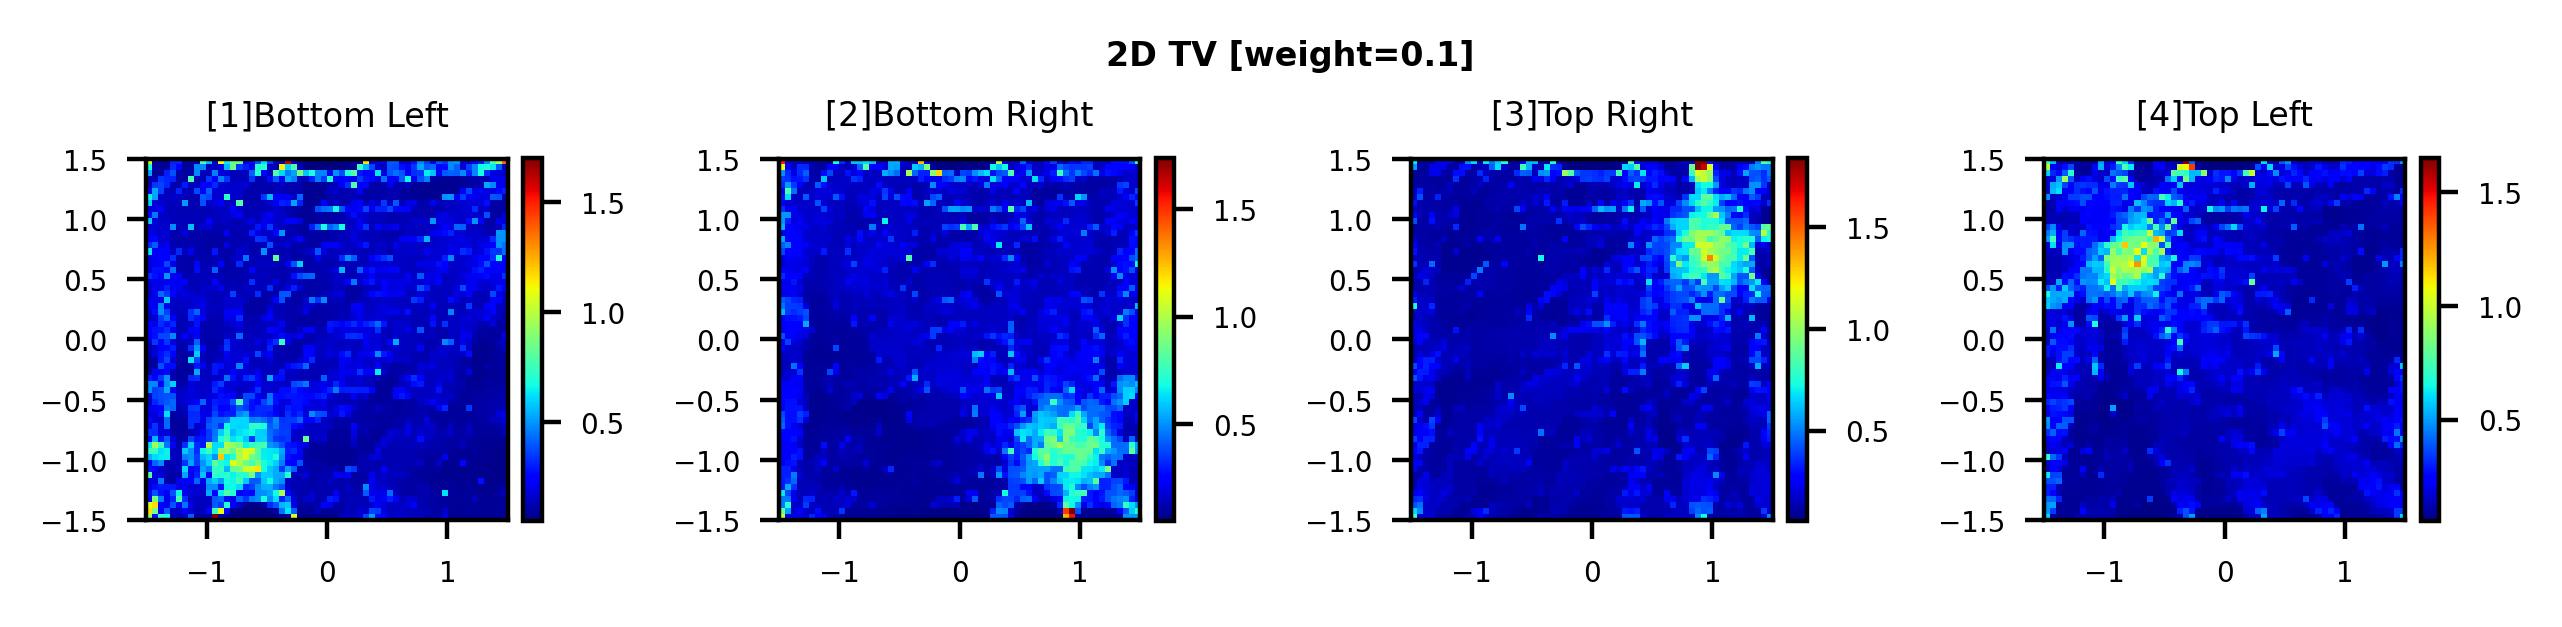

In [14]:
from skimage.restoration import denoise_tv_chambolle

weight = 0.1

plot_test_ptot([denoise_tv_chambolle(x, weight=weight) for x in result], f'2D TV [{weight=}]')


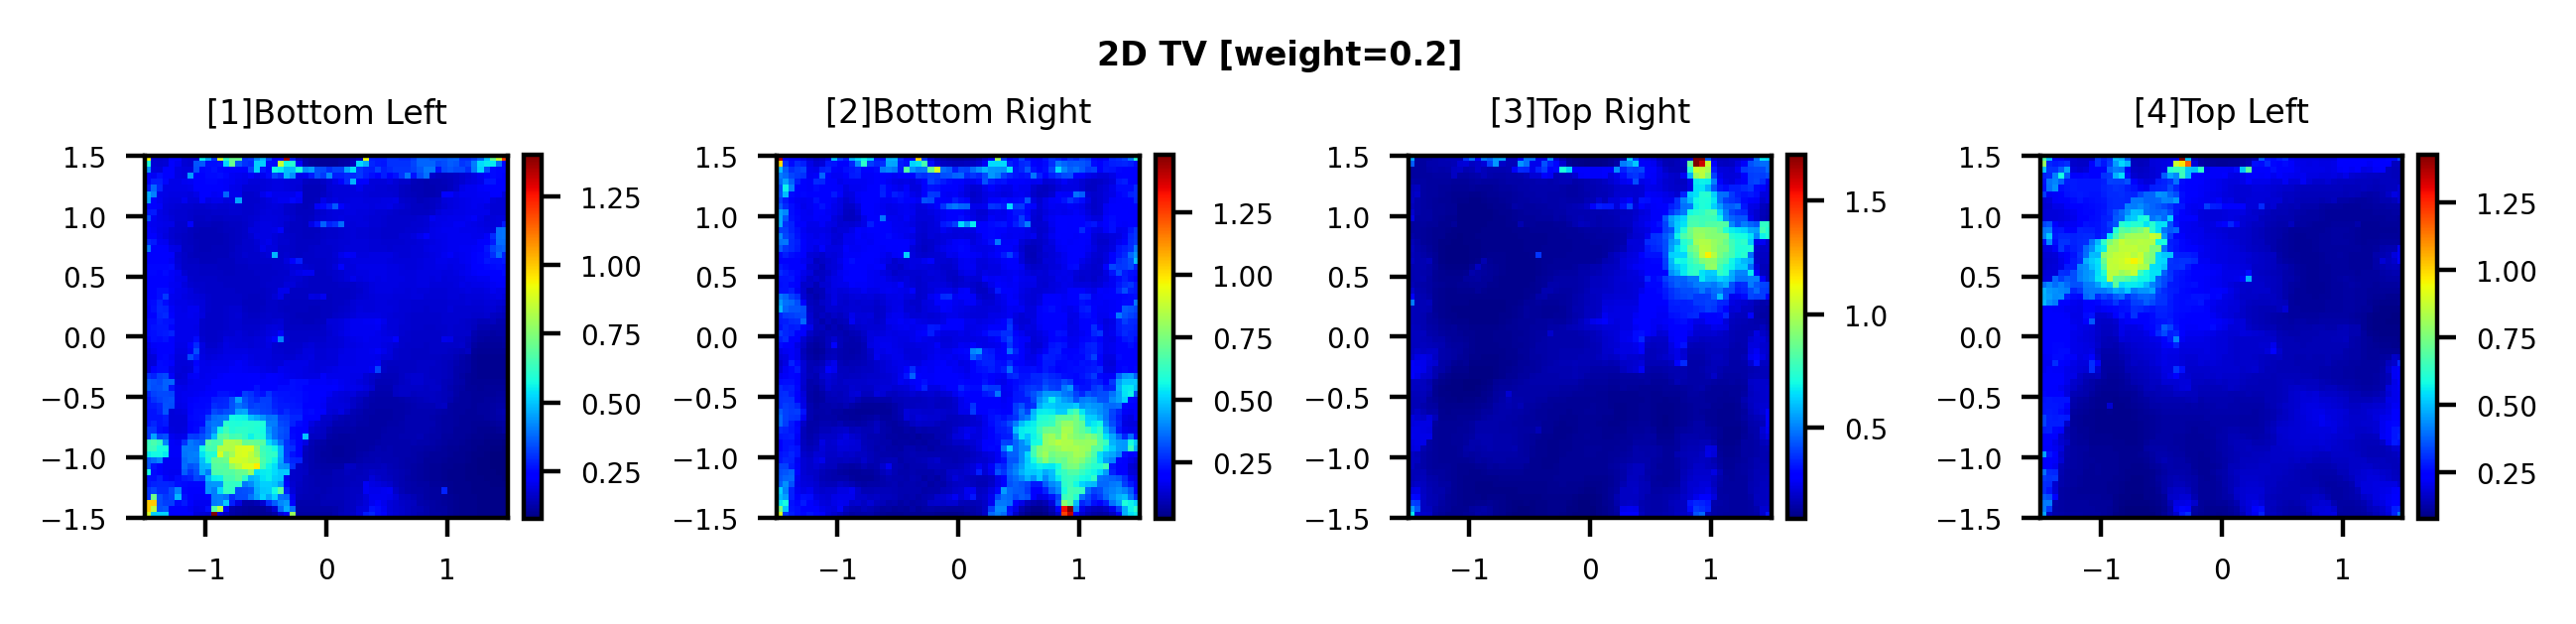

In [15]:
weight = 0.2

plot_test_ptot([denoise_tv_chambolle(x, weight=weight) for x in result], f'2D TV [{weight=}]')


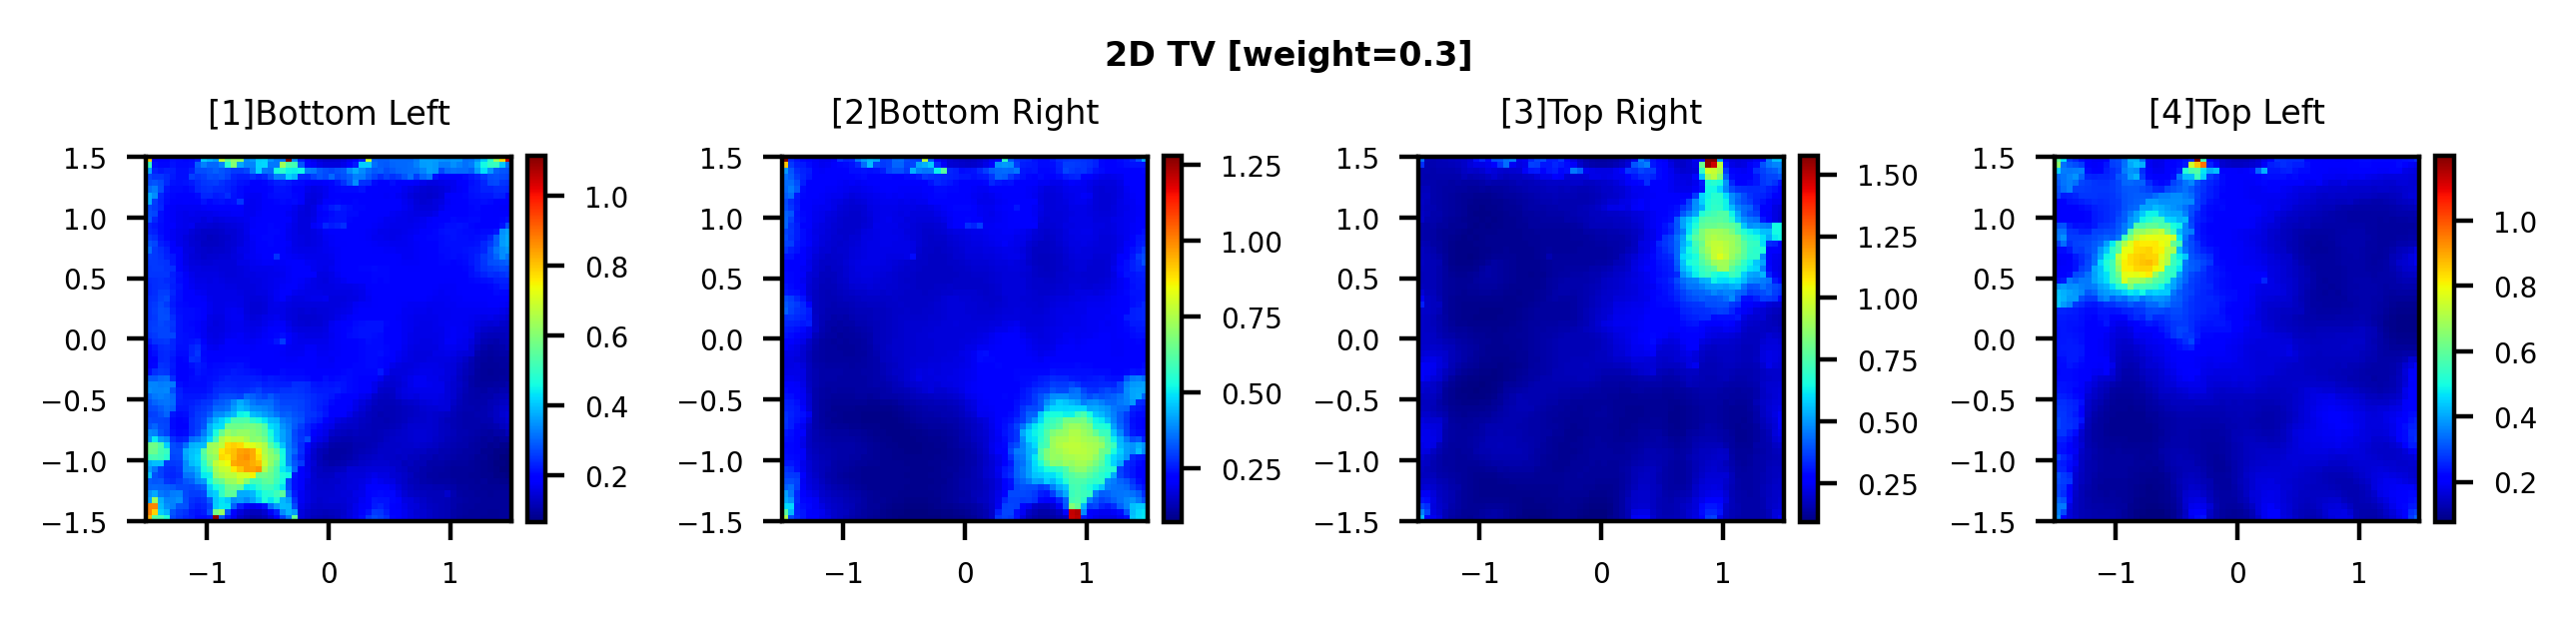

In [16]:
weight = 0.3

plot_test_ptot([denoise_tv_chambolle(x, weight=weight) for x in result], f'2D TV [{weight=}]')


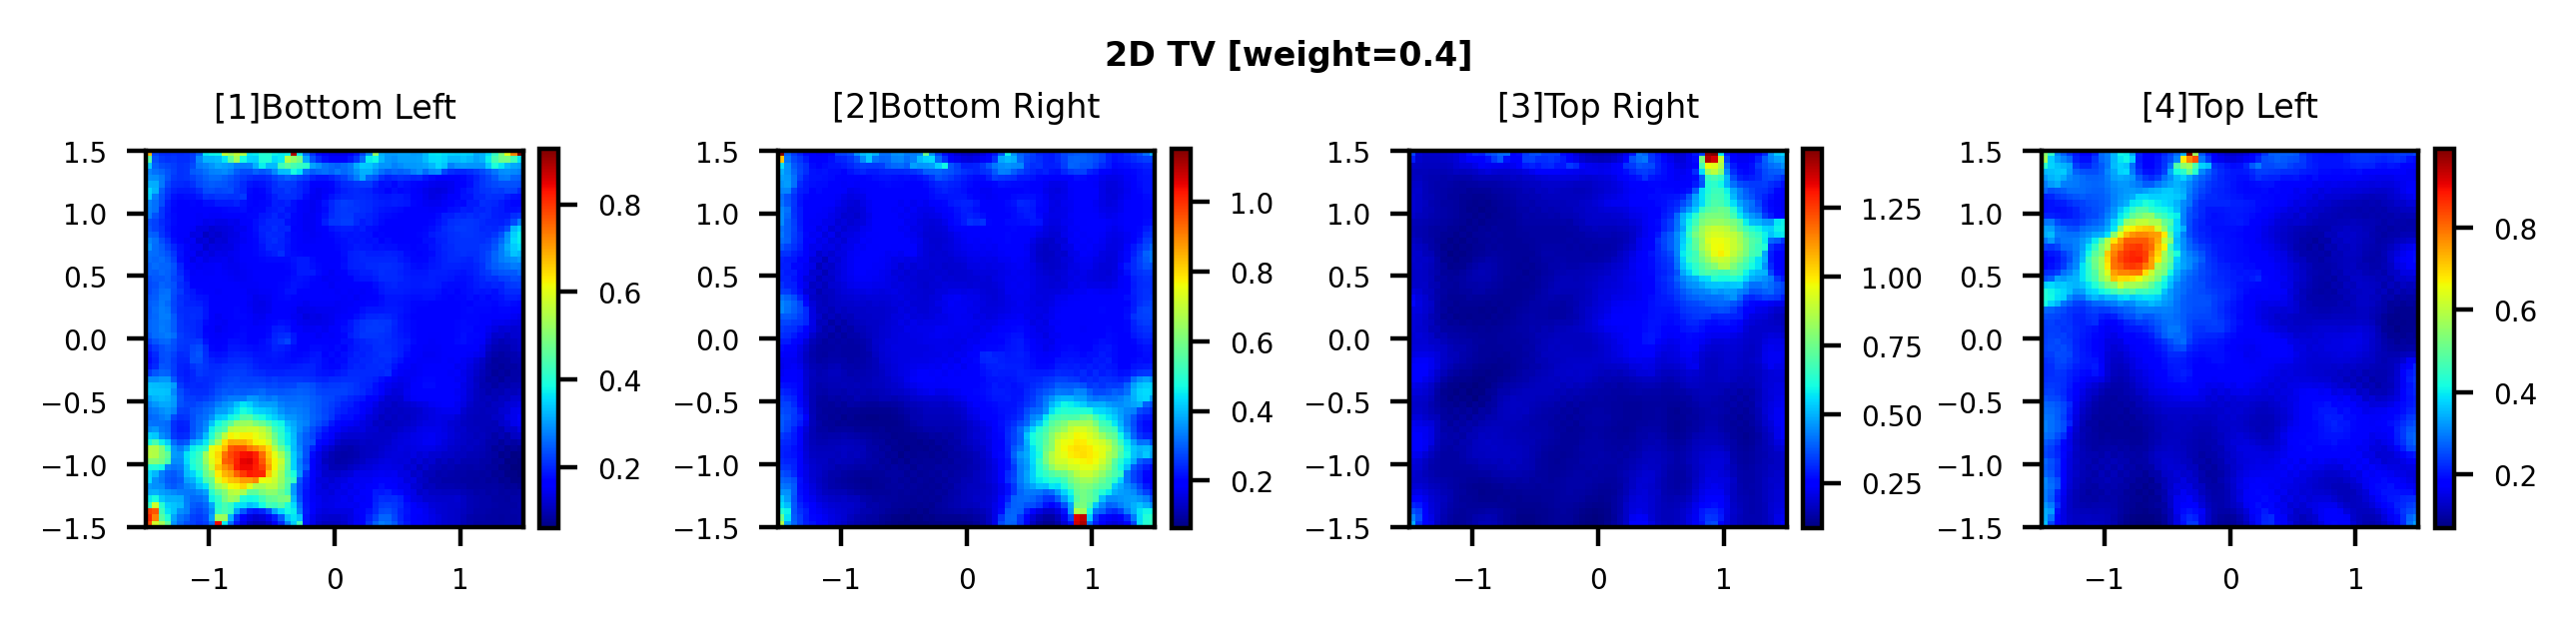

In [17]:
weight = 0.4

plot_test_ptot([denoise_tv_chambolle(x, weight=weight) for x in result], f'2D TV [{weight=}]')


In [18]:
Pryt = (Ptot-Pinc)/(20*np.log10(np.exp(1)))

lambda_max = np.linalg.norm((FrytB.T @ Pryt), ord=2)

A = FrytBat + lambda_max * parameters['alpha'] * np.identity(FrytB.shape[1])
B = FrytB.T



start = time.monotonic()
for _ in range(10):
    np.linalg.solve(A, B)
print((time.monotonic()-start)/10)


2.032620154999313


In [ ]:
import numba

@numba.jit(nopython=True)
def sum_list(arr):
    total = 0
    for i in range(len(arr)):
        total += arr[i]
    return total

# Example usage
my_list = [1, 2, 3, 4, 5]
print(sum_list(my_list))


In [ ]:
import numpy as np
import numba as nb
from timeit import default_timer as timer

# Define the function to be JIT-compiled
@nb.jit(nopython=True)
def solve_linear_system(A, b):
    return np.linalg.solve(A, b)
    # return x

# Generate a large random matrix A and vector b
size = 10000
A = np.random.rand(size, size)
b = np.random.rand(size)

# Time how long it takes to solve Ax=b using numpy.linalg.solve
start_np = timer()
x_np = np.linalg.solve(A, b)
end_np = timer()
time_np = end_np - start_np

# Time how long it takes to solve Ax=b using our JIT-compiled function
start_numba = timer()
x_numba = solve_linear_system(A, b)
end_numba = timer()
time_numba = end_numba - start_numba

# Print the results
print("Time using numpy.linalg.solve:", time_np)
print("Time using JIT-compiled function:", time_numba)
print("Speedup:", time_np / time_numba)
print("Maximum error:", np.max(np.abs(x_np - x_numba)))
